# Homework 1: Setup & Rounding Error
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 18

Nicholas Pham 

## Discussion

Feel free to use whatever resources you need to get up to speed with the tools (Python, Jupyter, GitHub). You are encouraged to work with other students, especially for technical set up. Please note the following:
* While you are free to discuss the problems, every line of code you type should be your own and *not* copied-and-pasted from anyone else. You should write your code without referring to anyone else.
* We will penalize plagiarism harshly.


## 1. Getting Set Up

Set up **Python** on your system. Version 3.6 is preferred, but we shouldn't have any major problems if you're using an earlier 3.x version or 2.7.

You are also responsible for setting up the **Jupyter** notebook (formerly iPython) environment. 

Sign up for a free **GitHub** account. The account should be associated with your UCR e-mail address. (You may also use an existing account.) All work for this course will be completed in Jupyter notebooks and submitted to GitHub. 
- I strongly suggest that you use a professional username. Your GitHub account is a de-facto resume/CV when you apply for jobs (both academic and industry).
- I also suggest uploading a photo to help us learn your names.

**Important**: send an e-mail to Prof. Tanedo and Corey Kownacki (TA). The subject of the e-mail should be *P177: Homework 1* and you should clearly indicate your GitHub username and the URL to your GitHub account. 


## 2. Cloning this notebook

Homework, like this one, will be posted to the course GitHub:  
https://github.com/orgs/Physics177-2017/  

For those already familiar with GitHub, you can go ahead and fork a copy of this notebook. The instructions below are the "round-about" way of doing things.

1. Download ("clone") this notebook to your own computer.

2. Open your local copy of this notebook.

3. Go to the top cell of this notebook and replace "**Your Name**" with your actual name. *Remark*: the anime film *Your Name* was recently released in US theaters. As of this writing, it has a 79% score on Metacritic.

4. Save this notebook

5. Create a new repository on GitHub called **P177_Homework01**. Initialize it with a **README.md** file, where you can briefly explain that this is Homework 1. Feel free to add any other comments in the README that you think are appropriate.

6. Upload your local copy of this notebook to this repository. Be sure to write a brief note under **Commit changes**. Say something like "initial upload."

7. Make sure that the copy of your homework in your repository actually has your name on top. If not, troubleshoot.

## 3. Markdown Practice

For this problem, I'd like you **create a markdown cell** just below this one and explore the markdown syntax. Use *Insert* > *Insert Cell Below* from this cell.

Here's one useful reference:
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

I'd like you to include the following in this new cell:
1. Create a subheading (using two hashtags) 
2. Create a list
3. Use **boldface** and *italics*
4. Your favorite equation, written in $\LaTeX$
5. Embed a YouTube trailer of the film *Your Name*. For this you may want to refer to http://stackoverflow.com/a/27315283. 

## Question 3 Response:This is a new Header that I made
### List of Fruits and Vegetables

1. Apples
2. Bananas
3. Carrots
4. I can't think of a fruit/vegetable that starts with 'D'

**Dates** are *fruits*, I think

Well, here is my favorite equation:

$ \partial G = VdP - SdT + \displaystyle\sum_{i=1}^{n} \left( \frac{\partial G}{ \partial N_{i}}\right )_{T,P}     dN_{i}$

where $  \left( \frac{\partial G}{ \partial N_{i}}\right )_{T,P} $ is $\mu_{i}$ , the chemical potential for each unique chemical species

*This this Gibb's modified equation for binary phase equilibria calculations.*

...And this is the trailer of the film *Your Name*. Click on it to watch! If that doesn't work, try the next cell!

[![IMAGE ALT TEXT HERE](http://img.youtube.com/vi/s0wTdCQoc2k/0.jpg)](http://www.youtube.com/watch?v=s0wTdCQoc2k)


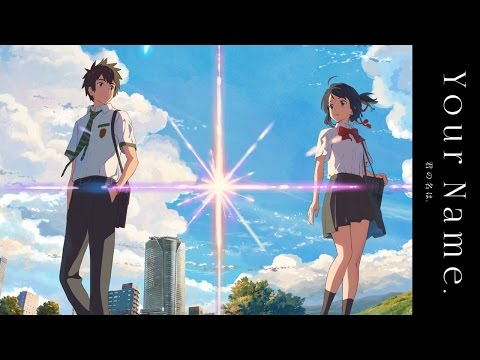

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('s0wTdCQoc2k')

## 4. Simpson's Rule
In class we built a simple Riemann sum integrator. The code that we wrote together is posted here:
https://github.com/Physics177-2017/Lec03-Rounding-Error

In this problem, please perform the *same* analysis on the *same* test function using **Simpson's rule**. 

What's that? Well, you'll have to read a little about it. You can find a discussion in section 5.1.2 of the course textbook (Newman, *Computational Physics*, 2nd ed.). For those who do not have a copy, you can find a discussion in Chapter 3 of Stickler's *Basic concepts in computational physics*, which is available electronically through the UCR library here: http://scotty.ucr.edu/record=b5077839~S5 (click on "Connect to: SpringerLink")

Create a cell below this one and do the following:
1. Create an "integrator" function that takes in a function and a spacing, $\Delta x$, and outputs the integral of that function from 0 .to 1 using Simpson's rule.

2. Use the same test function that we did in lecture: $$f(x) = 3.0\times 10^{-10} x^2.$$

3. Find the error on your algorithm (compared to the exact result) for $\Delta x$ of $10^{-1}, \cdots, 10^{-7}$.

4. Compare this to the errors that we found using the Riemann sum. Are they better? Worse? What happens as we approach the "$10^{-16}$" numerical precision?

## Question 4 Response
**1.**


I made two functions to analyze the difference between multiplicative and additive errors.

### ****Additive function****

In [3]:
def integrator(f,deltax):
    """This function integrates from 0 to 1 using Simpson's Rule"""
    count = 0.0
    summation = 0.0
    while (count < 1.0):
        summation = summation +  f(count) + 4*f(count + deltax) + f(count + 2*deltax)
        count = count + 2*deltax
    coefficent = deltax/3.0
    integral = coefficent * summation
    return integral

### ****Multiplicative Function****

In [4]:
def integrator2(f, deltax):
    """This function integrates from 0 to 1 using a different algorithm (still Simpson's Rule)"""
    initial = f(0.0) + f(1.0)
    coeff = deltax/3
    sum1 = 0.0
    sum2 = 0.0
    count1 = deltax
    count2 = 2*deltax
    while (count1 < 1.0):
        sum1 = sum1 + 4*f(count1)
        count1 = count1 + 2*deltax
    while(count2 < 1.0):
        sum2 = sum2 + 2*f(count2)
        count2 = count2 + 2*deltax
    total = coeff*(initial + sum2 + sum1)
    return total

**2.**

*Creating the test function and two error functions*

In [5]:
def f(x):
    """This is a sample function for testing"""
    return 3.0E-10*(x**2)

def error(deltax):
    """This calculates the error from the expected value due to rounding error"""
    return (integrator(f,deltax) - 1.0E-10)

def error2(deltax):
    """This calculates the error from the expected value due to rounding error"""
    return (integrator2(f,deltax) - 1.0E-10)

**3.**

**This is the additive method error test.**

In [6]:
listofstepsizes = [0.1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for index in listofstepsizes:
    print(index ,error(index))

0.1 1.2924697071141057e-26
0.01 1.4217166778255163e-25
0.001 0.0
0.0001 6.001200078745475e-14
1e-05 1.1733040001181852e-22
1e-06 5.999996555154413e-16
1e-07 5.137205194260578e-21


**This is the multiplicative method error test.**

In [7]:
listofstepsizes = [0.1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for index in listofstepsizes:
    print(index ,error2(index))

0.1 -2.5849394142282115e-26
0.01 6.462348535570529e-26
0.001 1.2924697071141057e-25
0.0001 1.999999998756999e-14
1e-05 1.1734332470888966e-22
1e-06 1.9999845333940636e-16
1e-07 5.135680080006184e-21


**4.**

The errors are much smaller than the Riemann Sum method. Also, the variation by changing the step size is varies much less pronouced than the Riemann sum method. Generally, the error is much better, but there is not a common trend as the step size decreases. However, there is a point after $1\times 10^{-03}$ where $0.0$ to $6.0\times 10^{-14}$. This must be the precision limit, where multiplied numbers are therefore rounded to the nearest binary equivalent due to lack of bit space. When adding multiple times, this error grows and produces an error. It is clear that there is no trend in error once it passes the precision limit. 

For the second multiplicative function, the errors are a bit smaller than the additive method. This implies that multiplication operations yield less rounding errors than adding operations. Comparing the errors, they both have the same order of magnitude. The dropoff point is still the same after $1\times 10^{-03}$. This must be the precision limit regardless of the algorithm applied.

## 5. Thinking about rounding errors

In your own words, explain what's happening in the following cell:

*When a decimal number is converted and stored as a binary entity, it only has a finite amount of bits that the computer can allocate to store a value. When adding these values together, there is a chance for rounding errors to appear, and at times, mathematical statements that are empirically correct are labeled incorrect by the computer due to lack of float precision.*

In [8]:
0.1+0.1+0.1 == .3

False

In a new cell below this one, explain why the above result is not surprising. What happens if you sum $0.1+0.1$ and compare it to $0.2$? Explain this.

### **Explanation**
In general, adding float types and applying them to booleans is dangerous because of the procedure in which the computer stores the information. However, in this case, Python uses IEEE-754 encoding, which represents decimal numbers in an binary coefficient and exponent notation.

In particular, 0.1 is not a clean number in binary (in fact, it is a repeating decimal in binary). Just like how $\frac{1}{3}$ is not a finite number in decimal.

$\frac{1}{3} = 0.3333333333...$

When this block of code runs in the Python interpreter, the left hand side of this statment starts by adding $0.1 + 0.1 = 0.2$ to achieve an intermediate value, which is then rounded to the nearest binary entity. The next step the interpreter takes is adding the last $0.1$ to the intermediate rounded value to obtain a final value. On the right hand side, the value $0.3$ is directly encoded and rounded to the nearest binary value. When the interpreter runs the boolean to check equality, it is not surprising that it returns false, as the accuracy near the precision limit is what causes the error.

Since $0.1$ is really not $0.1$ according to the computer, it is unlikely that adding three units of this will produce $0.3$.

In [9]:
0.1 + 0.1 == 0.2

True

### Explanation
Because of the manner in which the decimal digit is stored (as a base and exponent notation), is it possible that it could be easier that when adding 2 quantities, you minimize the chance for a rounding error. Moreover, since the number is stored as a base 2 (binary) quantity, it could also minimize rounding error. What should happen is:

$(base) \times 2^{mantissa} = 0.1$

$0.1 + 0.1 = 2 \times (base) \times 2^{mantissa}$

$ 0.2 = (base) \times 2^{mantissa + 1} $

Therefore, in this particular example, the base number does not have to change, but only the mantissa, and by only one. By only varying one of the two arguments, it could definitely minimize error and yield a **True** statement.

## X1. [Extra Credit] 

INSPIRE is a database of papers in high-energy physics, you can find it here: http://inspirehep.net

Write a script in Jupyter that takes a string and opens up a web browser with an INSPIRE search for that string.

In [10]:
import webbrowser
#To help with opening a URL

def inspireSearch(string):
    """This function will ouput a link to a search in the INSPIRE database. Prints 'Done' when successful"""
    #Transform a string to a list of characters
    charlist = list(string)
    #Change all of the spaces to '+' signs to input into URL
    for characterindex in range(len(charlist)):
        if charlist[characterindex] == ' ':
            charlist[characterindex] = '+'
    #Transform our list of characters back to a string
    editedstring = ''.join(charlist)
    webbrowser.open('http://inspirehep.net/search?ln=en&ln=en&p=' + editedstring + '&of=hb&action_search=Search&sf=earliestdate&so=d&rm=&rg=25&sc=0')
    return 'Done'

In [11]:
inspireSearch('quarks high energy')

'Done'